In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
#1



In [ ]:

# Load the data this old data brooo also da i tried but only getting 0.7 r2 score
file_path = '/content/updated dist data - Sheet1 (2).csv'
data = pd.read_csv(file_path)
data.loc[(data['YEAR'] >= 1990) & (data['YEAR'] <= 2000), ['ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_SW_DIFF', 'ALLSKY_SFC_SW_DNI']] = None

In [12]:
data.to_csv('updated_data1.csv', index=False)#i upadated it

In [21]:

file_path = '/content/cleaned_updated_data1.csv'#cleaned it using chat
data = pd.read_csv(file_path)

In [53]:
file_path = '/content/updated_dist_data_2.0 - Sheet1.csv'#cleaned it using chat #2
data = pd.read_csv(file_path)

In [54]:
data.head()

,YEAR,cropname,Yield,Location,ALLSKY_SFC_SW_DWN,CLOUD_AMT,CLRSKY_SFC_SW_DWN,PRECTOTCORR,PRECTOTCORR_SUM,PS,QV2M,RH2M,T2M_MAX,T2M_MIN,T2M_RANGE,WS50M,WSC
0,1990,RICE,2.752100,Hyderabad,19.03,70.30,23.50,0.0,843.75,95.29,12.88,62.94,43.22,11.60,31.62,5.91,3.83
1,1991,RICE,2.217016,Hyderabad,19.31,70.27,23.40,0.0,733.01,95.29,12.39,59.88,45.37,9.12,36.25,5.53,3.58
2,1992,RICE,2.102218,Hyderabad,19.66,63.34,23.26,0.0,738.28,95.33,11.66,57.38,43.32,9.63,33.69,5.30,3.44
3,1993,RICE,2.256410,Hyderabad,19.55,67.59,23.47,0.0,685.55,95.33,11.84,57.62,44.54,9.79,34.75,5.33,3.45
4,1994,RICE,2.314286,Hyderabad,19.07,66.12,23.33,0.0,754.10,95.30,12.51,61.56,44.90,9.83,35.07,5.55,3.59


In [4]:
data.describe()


,YEAR,Yield,ALLSKY_SFC_SW_DWN,CLOUD_AMT,CLRSKY_SFC_SW_DWN,PRECTOTCORR,PRECTOTCORR_SUM,PS,QV2M,RH2M,T2M_MAX,T2M_MIN,T2M_RANGE,WS50M,WSC
count,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,1736.000000,1736.000000
mean,2003.500000,0.914782,18.876707,56.715658,22.582748,1.083380,805.613885,97.100257,12.758136,59.252234,45.373532,9.971429,35.401346,5.023491,3.253808
std,8.079507,1.406116,0.413953,6.068219,0.379699,2.130182,193.422083,1.016706,0.832054,3.851105,1.212772,1.695236,2.207357,0.278397,0.179519
min,1990.000000,0.000000,17.450000,42.480000,21.770000,0.000000,358.590000,95.220000,10.740000,48.690000,41.980000,6.210000,31.340000,4.590000,2.970000
25%,1996.750000,0.092924,18.580000,52.460000,22.330000,0.000000,685.550000,96.980000,12.150000,56.560000,44.670000,8.670000,33.790000,4.810000,3.120000
50%,2003.500000,0.472900,18.880000,55.660000,22.580000,0.000000,791.020000,97.290000,12.730000,59.310000,45.510000,10.110000,35.050000,4.980000,3.220000
75%,2010.250000,1.099190,19.150000,61.150000,22.820000,0.000000,933.400000,97.470000,13.430000,62.190000,46.170000,11.280000,36.940000,5.220000,3.380000
max,2017.000000,19.000000,20.030000,70.300000,23.500000,5.270000,1297.270000,98.470000,14.650000,67.620000,48.010000,13.940000,41.420000,5.910000,3.830000


trying for rice


In [55]:

data=data.loc[data['cropname']=='RICE']
data=data.drop(columns=['WS50M','WSC','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN','PRECTOTCORR','T2M_RANGE','PRECTOTCORR_SUM'])
data['Yield']=data['Yield']*1000 #3
data.head()

,YEAR,cropname,Yield,Location,CLOUD_AMT,PS,QV2M,RH2M,T2M_MAX,T2M_MIN
0,1990,RICE,2752.100,Hyderabad,70.30,95.29,12.88,62.94,43.22,11.60
1,1991,RICE,2217.016,Hyderabad,70.27,95.29,12.39,59.88,45.37,9.12
2,1992,RICE,2102.218,Hyderabad,63.34,95.33,11.66,57.38,43.32,9.63
3,1993,RICE,2256.410,Hyderabad,67.59,95.33,11.84,57.62,44.54,9.79
4,1994,RICE,2314.286,Hyderabad,66.12,95.30,12.51,61.56,44.90,9.83


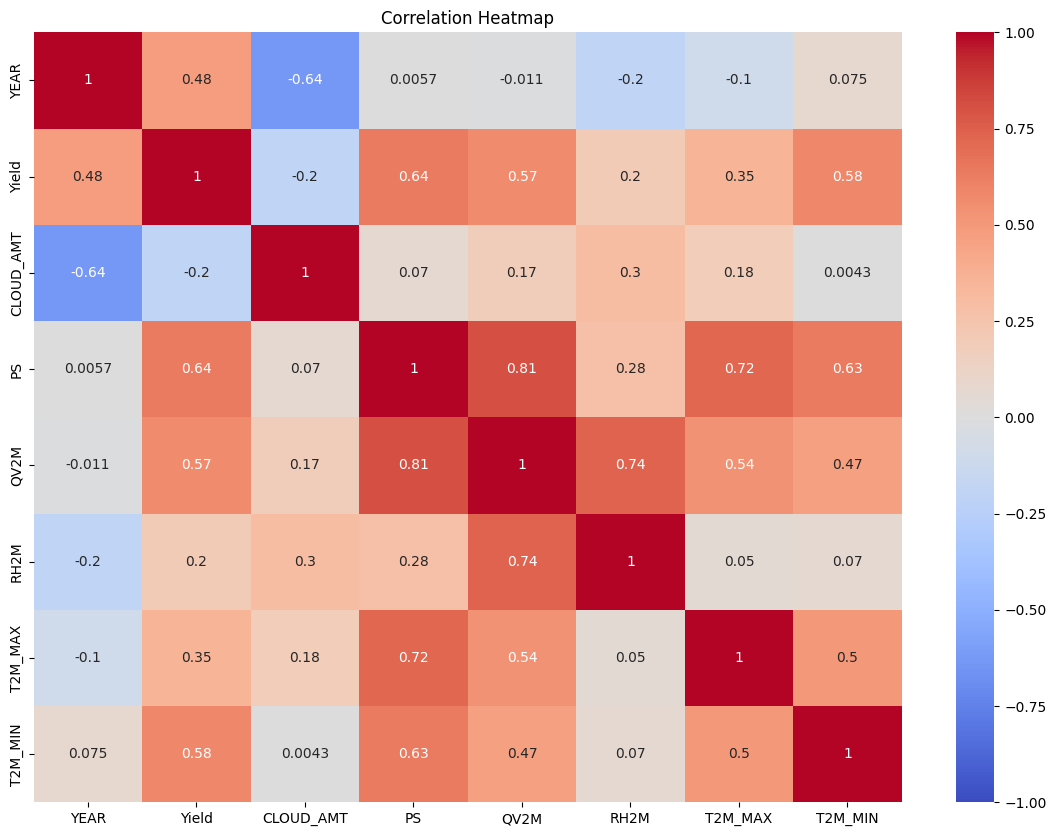

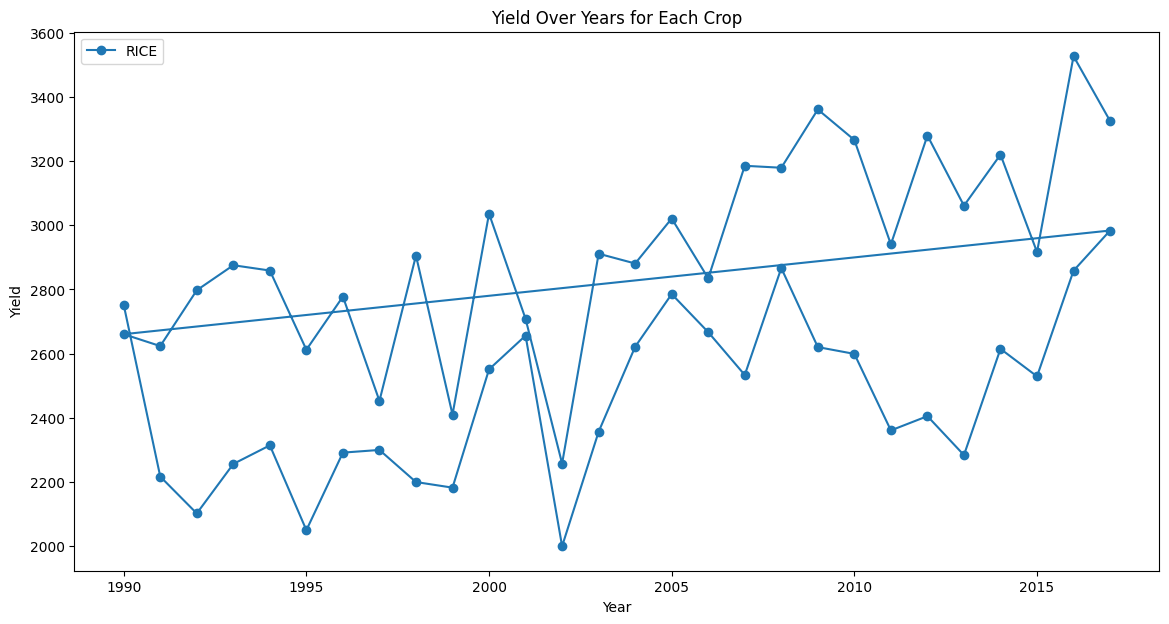

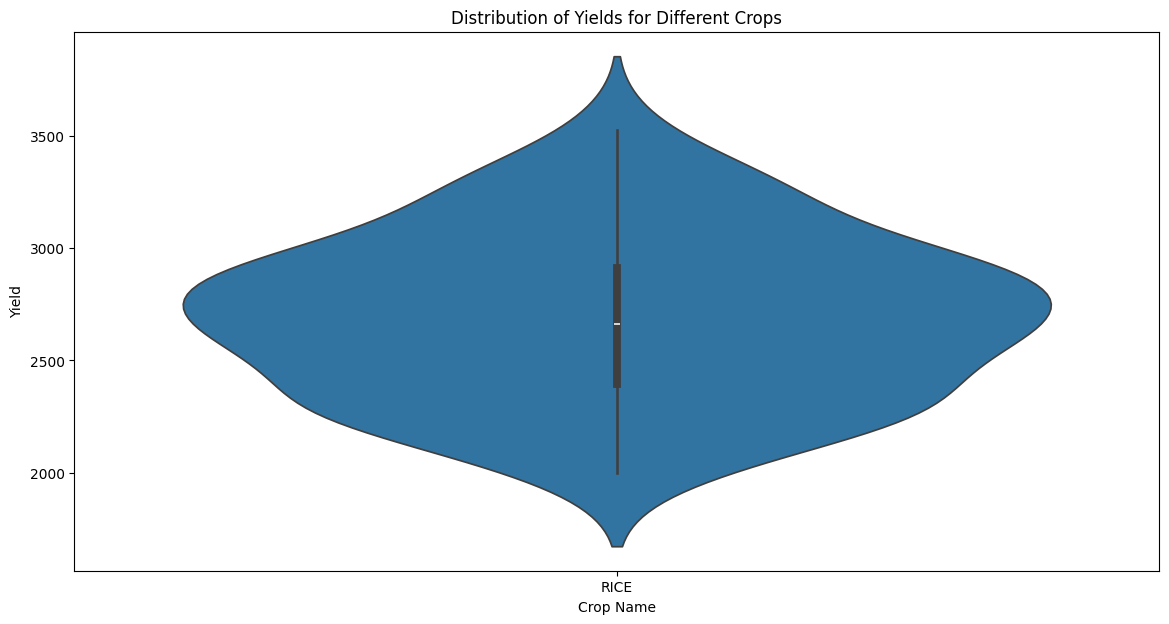

<ipython-input-56-bada5f62e207>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Yield'], shade=True)


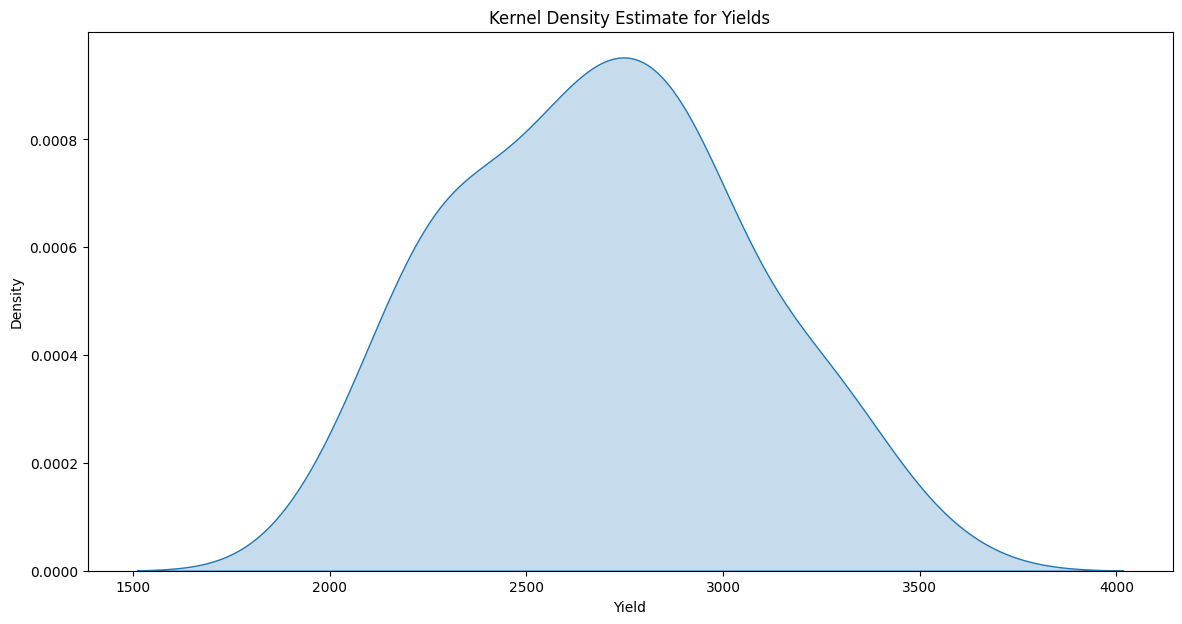

In [56]:
import pandas as pd #4
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df=data
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Line Plot: Yield over years for each crop
plt.figure(figsize=(14, 7))
for crop in df['cropname'].unique():
    crop_data = df[df['cropname'] == crop]
    plt.plot(crop_data['YEAR'], crop_data['Yield'], marker='o', label=crop)
plt.title('Yield Over Years for Each Crop')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.show()

# Area Plot: Cumulative weather parameters over years


# Violin Plot: Distribution of yields for different crops
plt.figure(figsize=(14, 7))
sns.violinplot(x='cropname', y='Yield', data=df)
plt.title('Distribution of Yields for Different Crops')
plt.xlabel('Crop Name')
plt.ylabel('Yield')
plt.show()

# KDE Plot: Kernel Density Estimate for yields
plt.figure(figsize=(14, 7))
sns.kdeplot(df['Yield'], shade=True)
plt.title('Kernel Density Estimate for Yields')
plt.xlabel('Yield')
plt.show()

# Bubble Chart: Yield vs. ALLSKY_SFC_PAR_TOT, size representing ALLSKY_SFC_SW_DIFF



In [57]:
X = data.drop(columns=['Yield'])
y = data['Yield']#5
X,y

(      YEAR cropname   Location  CLOUD_AMT     PS   QV2M   RH2M  T2M_MAX  \
 0     1990     RICE  Hyderabad      70.30  95.29  12.88  62.94    43.22   
 1     1991     RICE  Hyderabad      70.27  95.29  12.39  59.88    45.37   
 2     1992     RICE  Hyderabad      63.34  95.33  11.66  57.38    43.32   
 3     1993     RICE  Hyderabad      67.59  95.33  11.84  57.62    44.54   
 4     1994     RICE  Hyderabad      66.12  95.30  12.51  61.56    44.90   
 5     1995     RICE  Hyderabad      64.04  95.28  13.18  66.31    42.29   
 6     1996     RICE  Hyderabad      66.05  95.25  12.63  62.81    43.35   
 7     1997     RICE  Hyderabad      65.08  95.39  12.70  60.81    43.08   
 8     1998     RICE  Hyderabad      58.03  95.28  13.18  62.62    44.99   
 9     1999     RICE  Hyderabad      46.41  95.24  11.78  57.00    43.98   
 10    2000     RICE  Hyderabad      45.48  95.22  12.15  58.31    44.23   
 11    2001     RICE  Hyderabad      57.16  95.27  12.33  59.06    44.53   
 12    2002 

down is solo crop newer method

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('/content/nalg_data - Sheet1.csv')

# Display the first few rows of the dataset
print(data.head())

# Define features and target
features = data.drop(columns=['Yield','cropname','Location','PRECTOTCORR'])
target = data['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=1)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and train the linear regression model on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


   YEAR cropname    Yield  Location  ALLSKY_SFC_SW_DWN  CLOUD_AMT  \
0  1990     RICE  2.66069  Nalgonda              18.80      69.31   
1  1991     RICE  2.62370  Nalgonda              18.68      68.20   
2  1992     RICE  2.79757  Nalgonda              19.12      59.78   
3  1993     RICE  2.87556  Nalgonda              19.17      65.97   
4  1994     RICE  2.85903  Nalgonda              18.59      64.16   

   CLRSKY_SFC_SW_DWN  PRECTOTCORR  PRECTOTCORR_SUM     PS   QV2M   RH2M  \
0              23.12          0.0           817.38  98.33  14.04  63.38   
1              22.79          0.0           733.01  98.34  13.79  62.44   
2              22.61          0.0           680.27  98.39  13.06  60.31   
3              22.92          0.0           585.35  98.39  13.18  60.00   
4              22.87          0.0           791.02  98.35  13.73  62.81   

   T2M_MAX  T2M_MIN  T2M_RANGE  WS2M_RANGE  
0    45.33    13.94      31.38       11.37  
1    46.93    11.44      35.48        8.16  

In [27]:
from sklearn.preprocessing import MinMaxScaler #6
# Identify categorical and numerical columns
categorical_cols = ['cropname','Location']
numerical_cols = X.columns.difference(categorical_cols)

# Preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)



In [11]:
preprocessor#jus clarity

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['ALLSKY_SFC_SW_DWN', 'CLOUD_AMT', 'CLRSKY_SFC_SW_DWN', 'PRECTOTCORR',
       'PRECTOTCORR_SUM', 'PS', 'QV2M', 'RH2M', 'T2M_MAX', 'T2M_MIN',
       'T2M_RANGE', 'YEAR'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cropname', 'Location'])])

In [28]:

# Split the data into training and testing sets #7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

down one is one crop diff method from many  location many ccrop



In [9]:
param_grid = {
    'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature Importance
'''importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
print(feature_importance_df.sort_values('importance', ascending=False))'''

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'COTTON'

--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'RABI SORGHUM'


Starting for one crop in one location

In [58]:
#8
# Define the models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()

}

# Hyperparameter grids for each model
param_grids = {
    'RandomForest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    },

    'SVR': {
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['linear', 'rbf']
    }
}

best_models = {}
best_scores = {}

# Train and evaluate each model using GridSearchCV
for model_name, model in models.items():
    print(f'Training {model_name}...')
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    best_scores[model_name] = {'MSE': mse, 'R2': r2}

    print(f'Best {model_name} Model:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')

# Display the best scores for all models
for model_name, scores in best_scores.items():
    print(f'{model_name}:')
    print(f"  Mean Squared Error: {scores['MSE']}")
    print(f"  R-squared: {scores['R2']}\n")

Training RandomForest...
Best RandomForest Model:
Mean Squared Error: 0.11825849648257998
R-squared: 0.3933065620188777

Training GradientBoosting...
Best GradientBoosting Model:
Mean Squared Error: 0.1559848285394205
R-squared: 0.19976175315727052

Training XGBoost...
Best XGBoost Model:
Mean Squared Error: 0.13635084618200713
R-squared: 0.30048862363151563

Training SVR...
Best SVR Model:
Mean Squared Error: 0.07618448410206745
R-squared: 0.609155976479796

RandomForest:
  Mean Squared Error: 0.11825849648257998
  R-squared: 0.3933065620188777

GradientBoosting:
  Mean Squared Error: 0.1559848285394205
  R-squared: 0.19976175315727052

XGBoost:
  Mean Squared Error: 0.13635084618200713
  R-squared: 0.30048862363151563

SVR:
  Mean Squared Error: 0.07618448410206745
  R-squared: 0.609155976479796



Down is generalized for many crops and locations

In [14]:

# Define the models
models = {
    'SVR': SVR()

}

# Hyperparameter grids for each model
param_grids = {

    'SVR': {
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['linear', 'rbf']
    }
}

best_models = {}
best_scores = {}

# Train and evaluate each model using GridSearchCV
for model_name, model in models.items():
    print(f'Training {model_name}...')
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    best_scores[model_name] = {'MSE': mse, 'R2': r2}

    print(f'Best {model_name} Model:')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')

# Display the best scores for all models
for model_name, scores in best_scores.items():
    print(f'{model_name}:')
    print(f"  Mean Squared Error: {scores['MSE']}")
    print(f"  R-squared: {scores['R2']}\n")

Training SVR...
Best SVR Model:
Mean Squared Error: 1.0590155241894563
R-squared: 0.43522534632075616

SVR:
  Mean Squared Error: 1.0590155241894563
  R-squared: 0.43522534632075616

